In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
df = pd.read_csv('nm_sal_yr_pos_gp_min_pie_ovr_YA.csv', index_col = [0])
df = df[df['yearsAfter'] == 4]
grp = [5,10,15,30,60]

In [26]:
x_m = []
mean = []
std = []

for i in range(0,5):
    df1 = df[(df['overall'] >= grp[i]-(grp[i-1]-1)) & (df['overall'] <= grp[i])]#1 5 
#     display(df1)
    pie = df1['PIE'].values
    gp = df1['GP'].values
    pie = np.array(pie)
    gp = np.array(gp)
    gpp = (pie * gp)
    x_m.append(gpp)
    mean.append(gpp.mean())
    std.append(gpp.std())
    
    
    
    
    
    display(std[i]/mean[i])
   


0.41992368678782754

0.48465648770640796

0.5313288263959163

0.5484167678864282

0.5692219299407884

<Figure size 640x480 with 0 Axes>

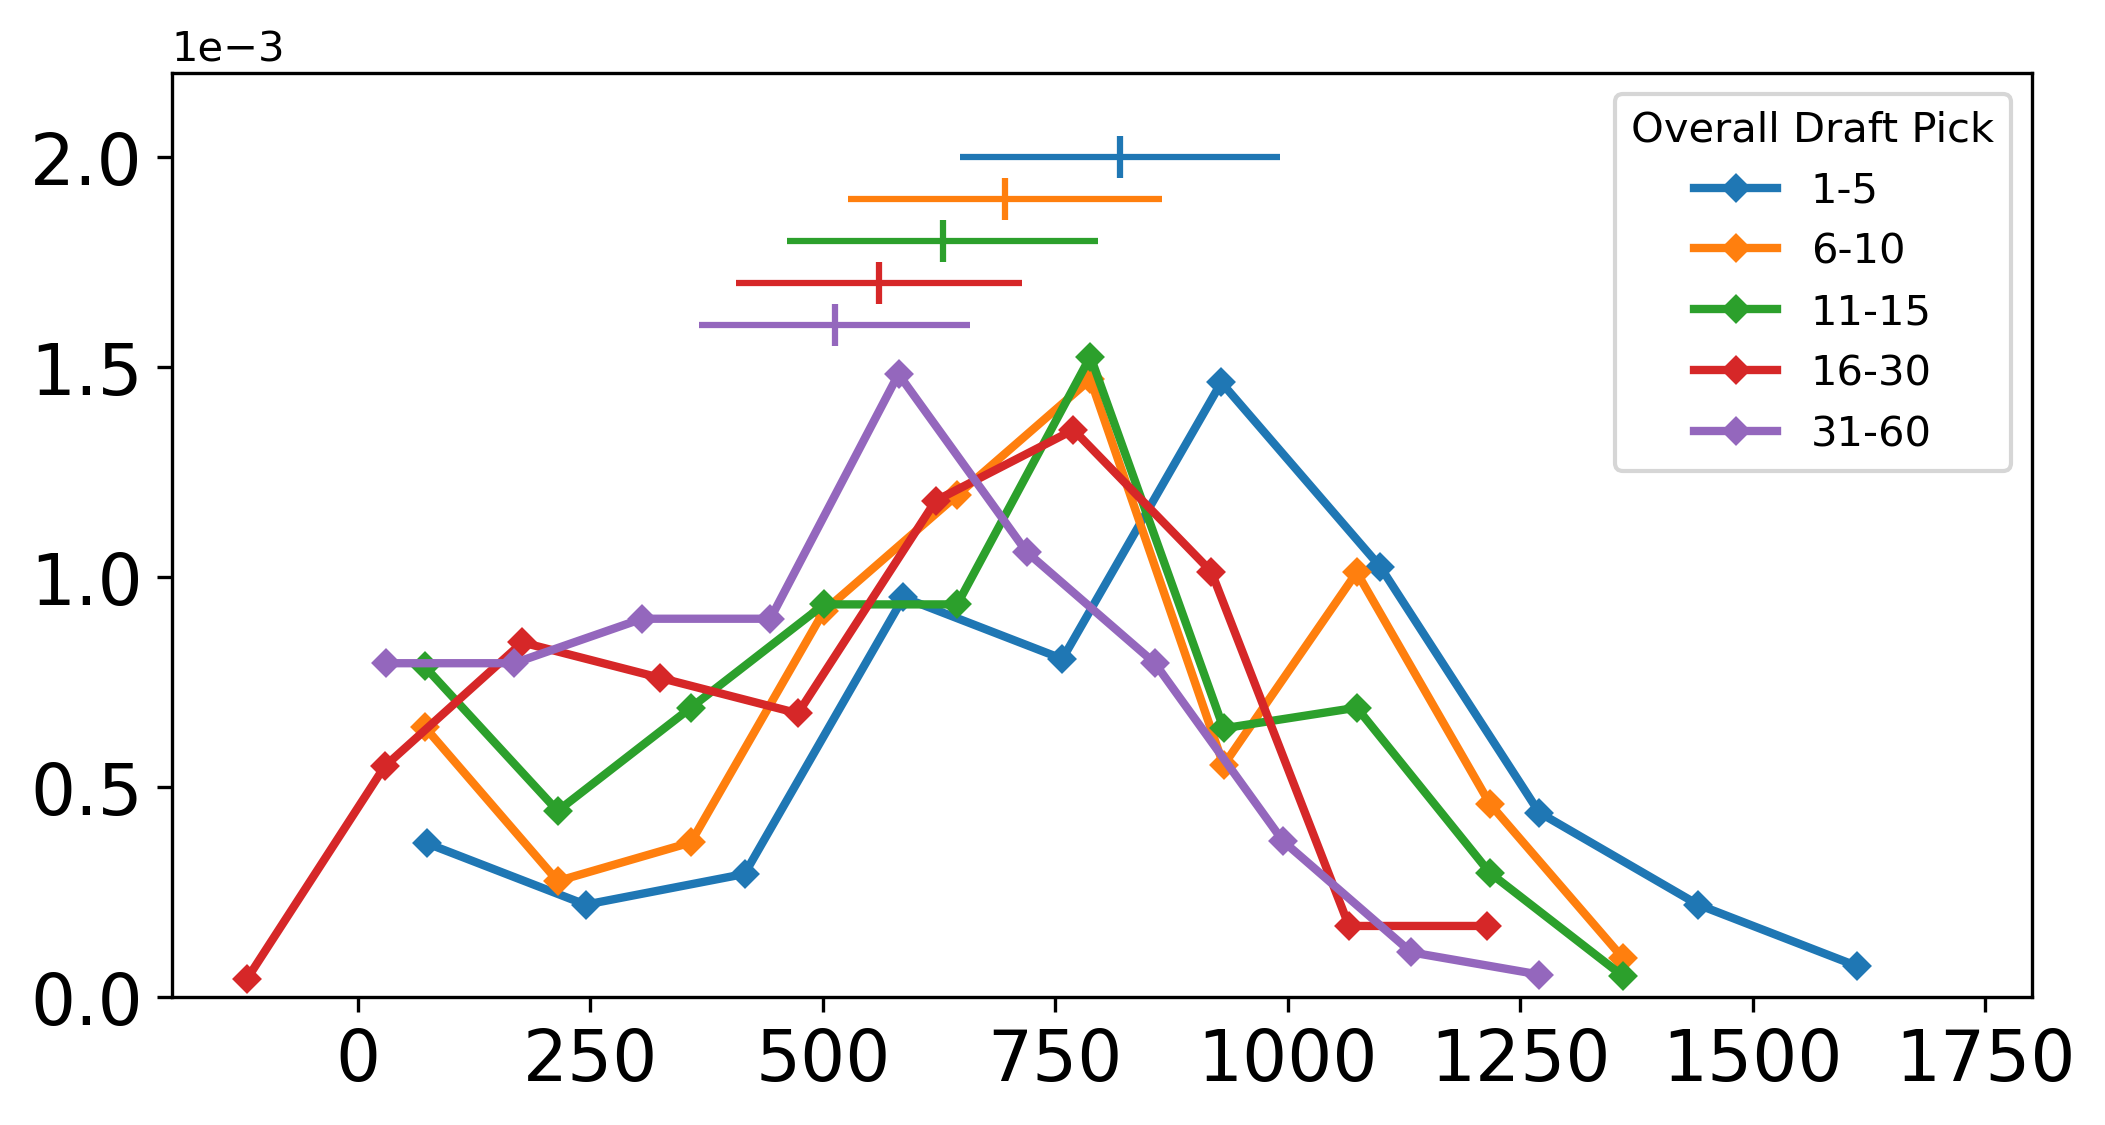

In [23]:
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
plt.clf()

f1, ax2 = plt.subplots(dpi=300,figsize=(8,4))
color = ['tab:blue','tab:orange', 'tab:green','tab:red','tab:purple']

for i in range(0,5):

    a1, b1=np.histogram(x_m[i],10)
    xt=b1[1:] #get the rightmost coordinates
    dx=xt[1]-xt[0] #get the bin width
    x=xt-dx/2 #shift to the bin middle

    #to normalize the values of the bins so that we get a probability ditribution
    L=len(x_m[i]) #number of data points
    y=a1/L/dx #divide by bin size and total number of points


    c = color[i]
    labels = [f'1-{grp[0]}',f'{grp[0]+1}-{grp[1]}',f'{grp[1]+1}-{grp[2]}',f'{grp[2]+1}-{grp[3]}',f'{grp[3]+1}-{grp[4]}']
    ax2.plot(x,y,'-D',color=c, linewidth=2,markersize=4, label = labels[i]);
    
    

h = 0.002
st = 0.00005
inc = 0.0001
for i in range(0,5):
    ax2.hlines(h - (inc * i), 0 + mean[i] - std[i]/2,std[i] + mean[i] - std[i]/2, color = color[i])
    ax2.vlines(x = mean[i], ymin = (h-st) - (inc * i), ymax = (h+st) - (inc * i) , color = color[i])

# ax2.set_xticks([-1, 0,1,2,3,4,5], ['-0.05','0', '.05', '.10','.15','.20','.25'])
# ax2.set_ylabel("Density Distribution")
# ax2.set_xlabel("Cumulative PIE score")
ax2.set_xlim(-200, 1800)
ax2.set_ylim(-0, 0.0022)
plt.legend(title="Overall Draft Pick")
ax2.tick_params(axis='x', labelsize=17)
ax2.tick_params(axis='y', labelsize=17)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.savefig('TotalPie Hist.png')
plt.show()

<Figure size 640x480 with 0 Axes>

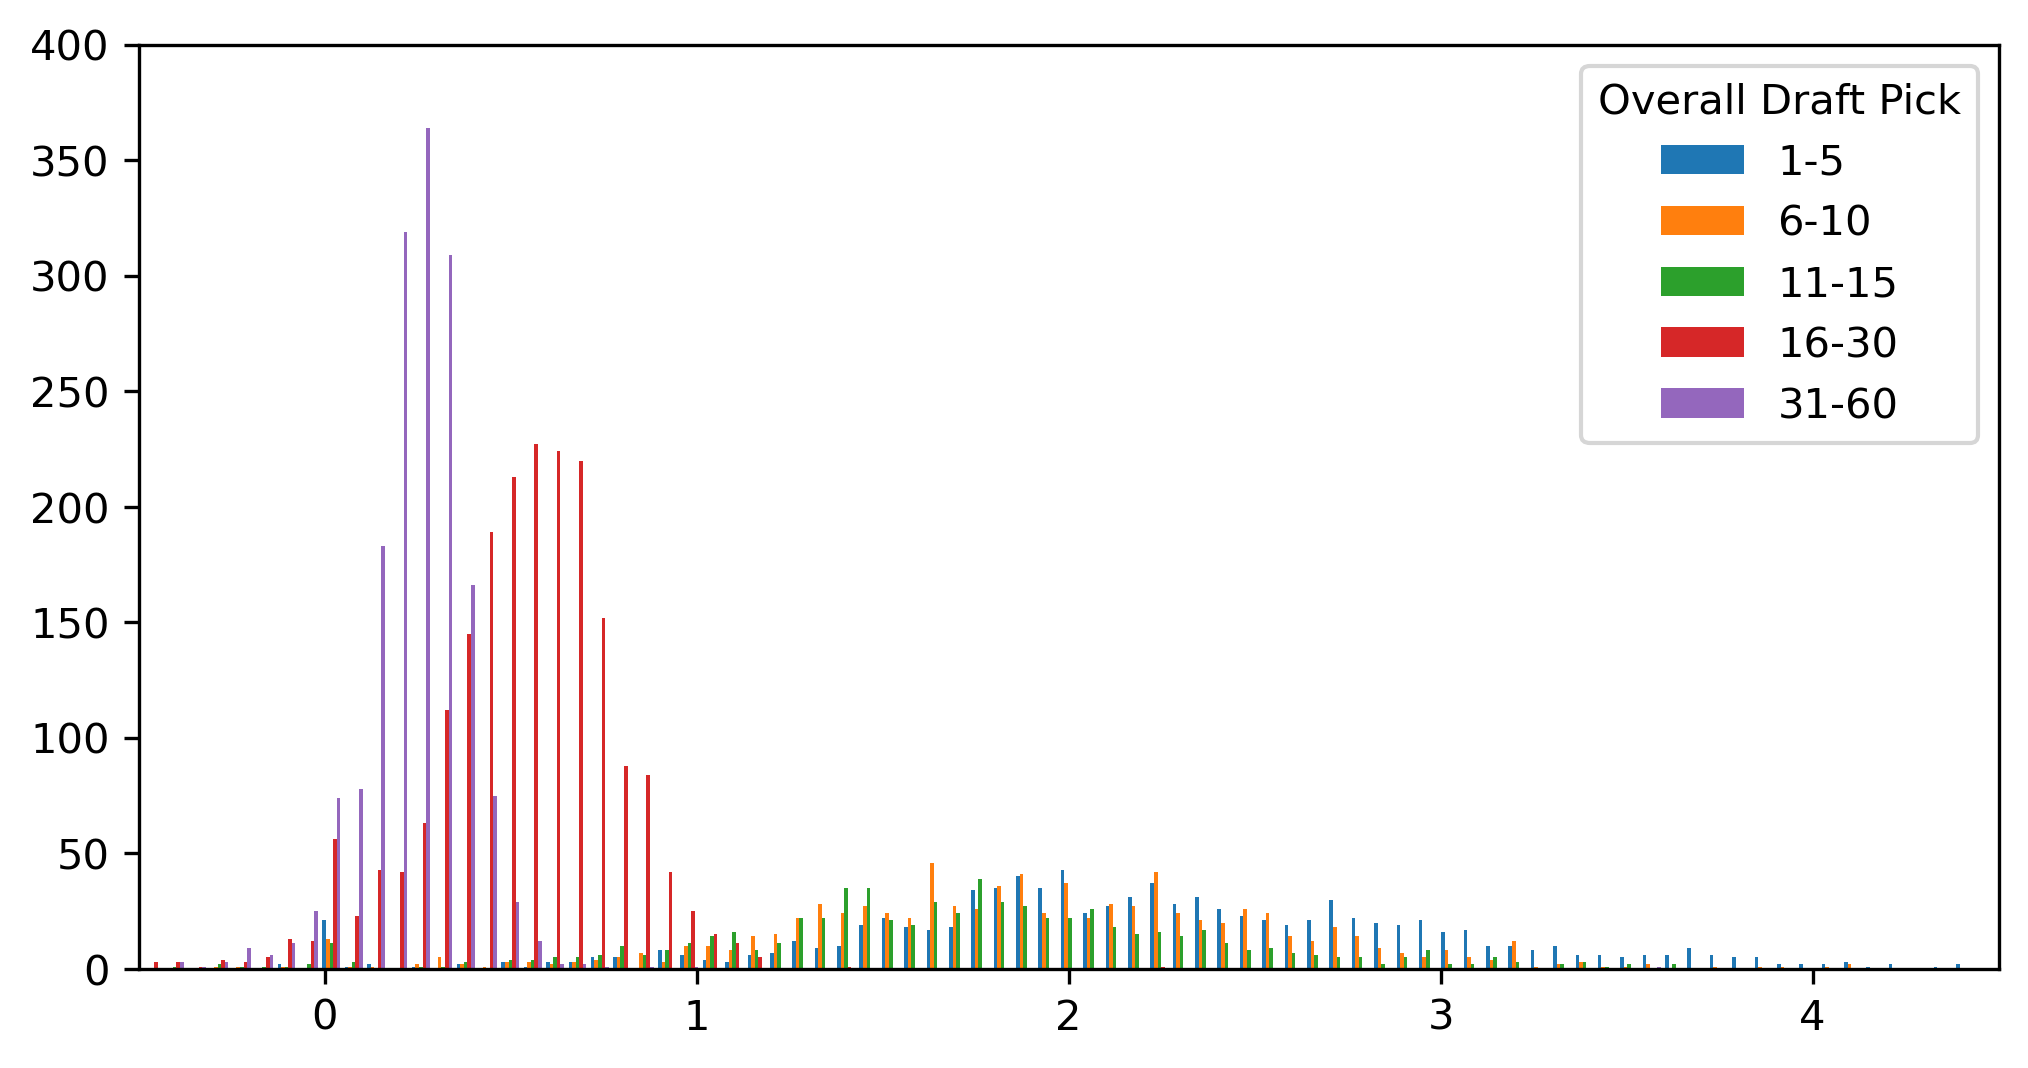

In [124]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

plt.clf()
ax = plt.figure(dpi=300,figsize=(8,4)).add_subplot()
ax.hist(x_m, 255, histtype='bar', label = ['1-5','6-10','11-15','16-30','31-60'])
ax.set_xlim(-0.5,4.5)
ax.set_ylim(0,400)
ax.set_xticks(range(0, 5))
#ax.set_xticks([0, 1, 2,3,4,], ['0', '.05', '.10','.15','.20'])
plt.legend(title="Overall Draft Pick")
plt.show()




#Pie Score vs draft pick.
#x-axis the pie score